<a href="https://colab.research.google.com/github/Porxelek/Genarall_Work/blob/main/Tweet_analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install skimpy
!pip install squarify
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 214 kB 34.0 MB/s 
     |████████████████████████████████| 1.1 MB 47.3 MB/s 
     |████████████████████████████████| 51 kB 7.6 MB/s 
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.5 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=2437e2064b41ea79cdde5b03a4c1ac641f973b30fd215bee75268f0d256671e7
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [2]:
from chart_studio import plotly

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from skimpy import clean_columns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

!pip3 install termcolor
from termcolor import colored
import squarify
# import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df0 = pd.read_json("/content/drive/MyDrive/Data/deneme.json", lines=True)
df = pd.DataFrame(df0.copy())

In [6]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]
    
def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'magenta', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'magenta', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), frozenset(df.nunique()),'\n',
          colored('-'*79, 'magenta', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), frozenset(missing_values(df)),'\n', 
          colored('-'*79, 'magenta', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), frozenset(list(df.columns)),'\n', 
          colored('-'*79, 'magenta', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'magenta', attrs=['bold']), sep='')

def first_looking_col(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False)) 
    

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'magenta', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'magenta', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'magenta', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=0, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

In [7]:
type(dict(df))

dict

In [8]:
df.shape

(42821, 36)

In [9]:
df.head(3).T

,0,1,2
id,1565674777792102400,1565674720267231232,1565674680157077504
conversation_id,1565662890388033536,1565674720267231232,1565662890388033536
created_at,2022-09-02 15:15:30 Turkey Standard Time,2022-09-02 15:15:16 Turkey Standard Time,2022-09-02 15:15:07 Turkey Standard Time
date,2022-09-02 00:00:00,2022-09-02 00:00:00,2022-09-02 00:00:00
time,15:15:30,15:15:16,15:15:07
timezone,300,300,300
user_id,1452305859556651016,1197131521703976961,730616797
username,ersin_sarigl2,cengizfatihzyu1,busrakalkann
name,Ersin Sarigül,Cengiz Fatih Özyurt,Büşra Kalkan
place,,,


In [10]:
df.sample(5).T

,18856,20436,34563,30213,38930
id,1565336662192058372,1565072834136838144,1565345451343130626,1566040670258831363,1564715599753752576
conversation_id,1565336662192058368,1565072834136838144,1565345451343130624,1566040670258831360,1564715599753752576
created_at,2022-09-01 16:51:57 Turkey Standard Time,2022-08-31 23:23:35 Turkey Standard Time,2022-09-01 17:26:52 Turkey Standard Time,2022-09-03 15:29:26 Turkey Standard Time,2022-08-30 23:44:04 Turkey Standard Time
date,2022-09-01 00:00:00,2022-08-31 00:00:00,2022-09-01 00:00:00,2022-09-03 00:00:00,2022-08-30 00:00:00
time,16:51:57,23:23:35,17:26:52,15:29:26,23:44:04
timezone,300,300,300,300,300
user_id,396731390,1472252506046705665,944291694606012417,1418234334784495616,1100020498749104128
username,mehmetakdeniz6,undineppp,teknofest,sytnsevda,isubukariyer
name,Mehmet Akdeniz,jlayda,TEKNOFEST,Sevda,ISUBÜ Kariyer Merkezi
place,,,,,


In [11]:
df.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
42816,1563089514205106177,1563089514205106176,2022-08-26 12:02:35 Turkey Standard Time,2022-08-26,12:02:35,300,1554772130805518338,herteknoloji,HerTeknoloji,,İmam Hatiplilerin Teknofest 2021'deki başarısı...,tr,[],[https://herteknoloji.com/imam-hatiplilerin-te...,[],0,0,0,[],[],https://twitter.com/HerTeknoloji/status/156308...,False,,0,,,,,,,,[],,,,
42817,1563088420762632194,1563088420762632192,2022-08-26 11:58:14 Turkey Standard Time,2022-08-26,11:58:14,300,1528838871047446529,erkanngulcicekk,Erkan Gülçiçek,,@kilicdarogluk bay Kemal @teknofest 'e gele...,tr,"[{'screen_name': 'teknofest', 'name': 'teknofe...",[],[],0,0,0,[],[],https://twitter.com/Erkanngulcicekk/status/156...,False,,0,,,,,,,,[],,,,
42818,1563086614158782466,1563086614158782464,2022-08-26 11:51:04 Turkey Standard Time,2022-08-26,11:51:04,300,922891473460264961,19mayisbld,19 Mayıs Belediyesi,,TEKNOFEST Rüzgârı Karadeniz’den Esiyor. 🤩🌊🚀 B...,tr,"[{'screen_name': 'samsunbsb', 'name': 'samsun ...",[],[https://pbs.twimg.com/media/FbEy_fsWIAAz9n4.jpg],0,0,5,[],[],https://twitter.com/19MayisBld/status/15630866...,False,,1,https://pbs.twimg.com/media/FbEy_fsWIAAz9n4.jpg,,,,,,,[],,,,
42819,1563086038112751616,1563086038112751616,2022-08-26 11:48:46 Turkey Standard Time,2022-08-26,11:48:46,300,1541448781,samsunhaber_smg,Samsun Gazetesi - Samsun Haber - Son Dakika,,Samsun Haber | Samsun'da TEKNOFEST teyakkuzu: ...,tr,[],[https://www.samsungazetesi.com/samsun-haber-s...,[https://pbs.twimg.com/media/FbEydJjWAAADq_e.jpg],0,0,0,"[samsun, samsunhaber]",[],https://twitter.com/samsunhaber_smg/status/156...,False,,1,https://pbs.twimg.com/media/FbEydJjWAAADq_e.jpg,,,,,,,[],,,,
42820,1563086002935459844,1563086002935459840,2022-08-26 11:48:38 Turkey Standard Time,2022-08-26,11:48:38,300,380327620,osmanaslan5860,Dr. Osman ASLAN 🇹🇷,,"""Batı kültür endüstrisi geldiği nokta itibariy...",tr,"[{'screen_name': 'alisatantarih', 'name': 'ali...",[],[https://pbs.twimg.com/media/FbEyb3iWQAAxLMX.jpg],0,0,6,[],[],https://twitter.com/OsmanAslan5860/status/1563...,False,,1,https://pbs.twimg.com/media/FbEyb3iWQAAxLMX.jpg,,,,,,,[],,,,


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42821 entries, 0 to 42820
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               42821 non-null  int64         
 1   conversation_id  42821 non-null  int64         
 2   created_at       42821 non-null  object        
 3   date             42821 non-null  datetime64[ns]
 4   time             42821 non-null  object        
 5   timezone         42821 non-null  int64         
 6   user_id          42821 non-null  int64         
 7   username         42821 non-null  object        
 8   name             42821 non-null  object        
 9   place            42821 non-null  object        
 10  tweet            42821 non-null  object        
 11  language         42821 non-null  object        
 12  mentions         42821 non-null  object        
 13  urls             42821 non-null  object        
 14  photos           42821 non-null  objec

In [13]:
df.drop_duplicates(subset=['conversation_id', 'id','user_id'], keep='first', inplace= True)

In [14]:
df.shape

(16133, 36)

In [15]:
missing_values(df)

,Missing_Number,Missing_Percent


In [16]:
df.isnull().sum()

id                 0
conversation_id    0
created_at         0
date               0
time               0
timezone           0
user_id            0
username           0
name               0
place              0
tweet              0
language           0
mentions           0
urls               0
photos             0
replies_count      0
retweets_count     0
likes_count        0
hashtags           0
cashtags           0
link               0
retweet            0
quote_url          0
video              0
thumbnail          0
near               0
geo                0
source             0
user_rt_id         0
user_rt            0
retweet_id         0
reply_to           0
retweet_date       0
translate          0
trans_src          0
trans_dest         0
dtype: int64

In [17]:
print(f" Data Available since {df.created_at.min()}")
print(f" Data Available upto {df.created_at.max()}")

 Data Available since 2022-08-26 11:48:38 Turkey Standard Time
 Data Available upto 2022-09-04 15:50:10 Turkey Standard Time


In [18]:
print('The oldest user in the data was',df.loc[df['created_at'] == '2022-08-26 11:48:38 Turkey Standard Time', 'name'].values)

The oldest user in the data was ['Dr. Osman ASLAN 🇹🇷']


In [19]:
df['created_at'] = df['created_at'].str.split(" ").str[0]

In [20]:
import plotly.io as pio
pio.renderers.default = "colab"

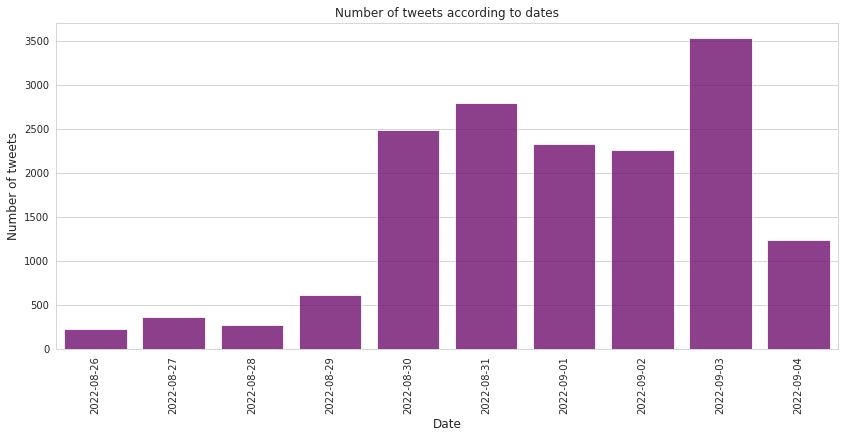

In [21]:

df['created_at'] =  pd.to_datetime(df['created_at'])
cnt_srs = df['created_at'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='purple')
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title("Number of tweets according to dates")
plt.show()

In [22]:
cnt_ = df['created_at'].value_counts()
cnt_ = cnt_.sort_index() 
fig = {
  "data": [
    {
      "values": cnt_.values,
      "labels": cnt_.index,
      "domain": {"x": [0, .5]},
      "name": "Number of tweets per day",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Percentage of tweets per days of the week",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
             "text": "Percentage of Tweets according to days of the week",
                "x": 0.50,
                "y": 1
            },
        ]
    }
}
iplot(fig)
cnt_

2022-08-26     229
2022-08-27     367
2022-08-28     272
2022-08-29     615
2022-08-30    2489
2022-08-31    2796
2022-09-01    2333
2022-09-02    2265
2022-09-03    3530
2022-09-04    1237
Name: created_at, dtype: int64

In [23]:
x = 0.
y = 0.
width = 150.
height = 300.
type_list = list(df['created_at'].unique())
values = [len(df[df['created_at'] == i]) for i in type_list]

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

color_brewer = ['#2D3142','#4F5D75','#BFC0C0','#F2D7EE','#EF8354','#839788','#EEE0CB']
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 2 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}-{}".format(type_list[counter], values[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)
        
layout = dict(
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF")
)

# With hovertext
figure = dict(data=[trace0], layout=layout)
iplot(figure, filename='squarify-treemap')

In [24]:
df['created_at_hour'] = df['time'].dt.hour
#https://stackoverflow.com/questions/33365055/attributeerror-can-only-use-dt-accessor-with-datetimelike-values


AttributeError: ignored

In [25]:
cnt_ = df['time'].value_counts()
cnt_ = cnt_.sort_index() 
trace1 = go.Scatter(
                    x = cnt_.index,
                    y = cnt_.values,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                    )

data = [trace1]
layout = dict(title = 'Number of tweets per hour',
              xaxis= dict(title= 'Tweets per hour',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [26]:
#most favourite and retweeted tweet
print(f" Maximum number of retweets {df.retweets_count.max()}")
print(f" Maximum number of favorites {df.likes_count.max()}")

 Maximum number of retweets 7552
 Maximum number of favorites 33660


In [27]:
#lets see the tweet which has the maximum retweet count
df.loc[df['retweets_count']==7552,'tweet'].values

array(['Millî teknoloji hamlemizin lokomotifi, yeni ufuklara açılmanın, geleceği tasarlamanın, en yeni teknolojilerin festivali...  Yarın ben de gençlerimizle birlikte TEKNOFEST Samsun’da olacağım… 🇹🇷  https://t.co/JTmrkb2029'],
      dtype=object)

In [28]:
import cufflinks as cf
from collections import defaultdict
from plotly import tools
from plotly.graph_objs import Scatter, Figure, Layout
cf.set_config_file(offline=True)
from textblob import TextBlob
from nltk.corpus import stopwords
# eng_stopwords = set(stopwords.words("english"))
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
# import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
import squarify

# print(os.listdir('../input'))

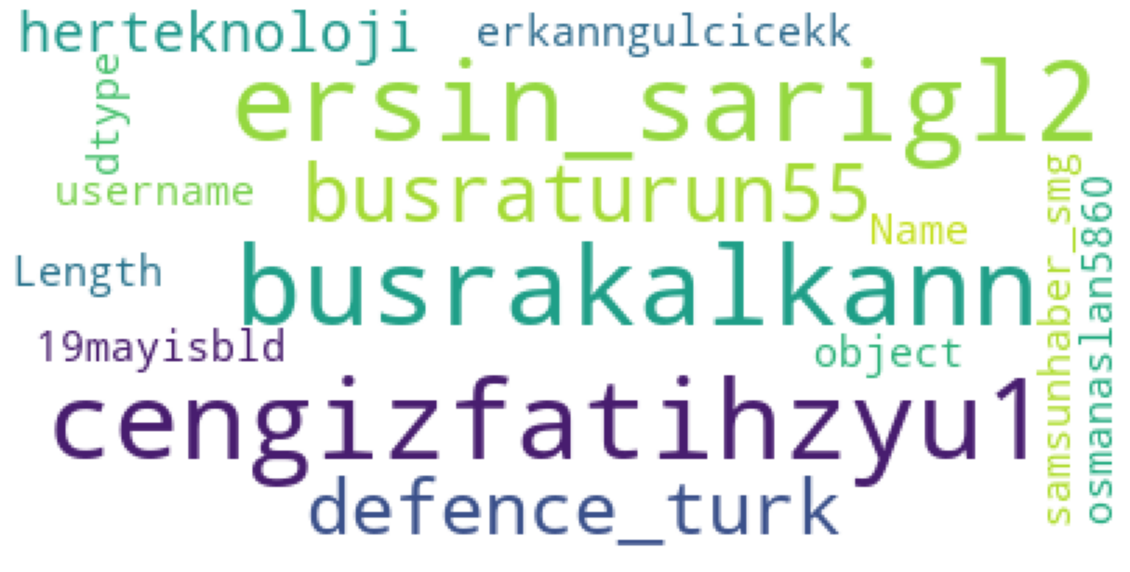

In [29]:
wordcloud__ = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(df['username'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud__)

In [30]:
#wordcloud
wordcloud_ = WordCloud(
                          background_color='black',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(df['user_description'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_)

KeyError: ignored

In [31]:
df['sentiment'] = df['tweet'].map(lambda text: TextBlob(text).sentiment.polarity)

In [32]:
print("5 random tweets with highest positive sentiment polarity: \n")
cL = df.loc[df.sentiment==1, ['tweet']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random tweets with highest positive sentiment polarity: 

Teknofest'te sola türk gösterisi, dosta güven, düşmana ve 3 yaşındaki yeğenime korku saldı. Not: altına işedi :D

BEST For Energy Projesi kapsamında geliştirdiğimiz ve uyguladığımız Temiz Enerji Çocuk Atölyeleri, Samsun’da düzenlenen TEKNOFEST Havacılık, Uzay ve Teknoloji Festivali’nde çocuklarla buluşmaya devam ediyor.  @TCSanayi @izmirkalkinma @ensiatr @RekabetciSP @EUDelegationTur  https://t.co/MZVz1scLMT

@TBaranjre @teknofest "Yaw biraz oynayıp geri getirecekler çocuklar." :D  https://t.co/r8KKnfeHmk

BEST For Energy Projemiz kapsamında geliştirdiğimiz ve uyguladığımız Temiz Enerji Çocuk Atölyeleri TEKNOFEST’te yerini aldı.   @izmirkalkinma  @ensiatr   @RekabetciSP   @EUDelegationTur  @DAIGlobal  @teknofest  @izmireba   #BESTForEnergy #CleanEnergy #TemizEnerji #RenewableEnergy  https://t.co/I0blCbxT17

Sıcaklık ideal Yunan denize dökülebilir! 🇹🇷  #Greece #HaddiniBilHilmi #TEKNOFEST  Yunanistan Kaşınma #uzmançavuş #izmir #

In [33]:
print("5 random tweets with highest nagative sentiment polarity: \n")
cL = df.loc[df.sentiment==-1, ['tweet']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random tweets with highest nagative sentiment polarity: 



ValueError: ignored

In [34]:
print("5 random tweets with neutral sentiment polarity: \n")
cL = df.loc[df.sentiment==0, ['tweet']].sample(5).values
for c in cL:
    print(c[0])
    print()

5 random tweets with neutral sentiment polarity: 

bilim ve teknoloji uğruna kaç deodoranttan vazgeçtim bir bilsen #TEKNOFEST

@bydrn66 Hı hıh,Orta çağ zihniyeti. Bu yönetimin yolunu açtığı gençlerin, çağın ötesinde neler yaptığını görmek için Teknofest'e gelsin bu amca. Hangi çağda olduğunu şaşırır.

Teknofest Samsun'da Bilim Pursaklar olarak biz de varız!  #TeknofestKaradeniz  #MilliTeknolojiHamlesi   @T3Vakfi  @t3bilimtr  @teknofest  https://t.co/ShMNkC7F3b

Teknofest 2022 Samsun’un ev sahipliğinde heyecanla devam ediyor.  OMÜ’nün, Teknofest’te açtığı stantta ziyaretçiler yoğun ilgi göstermeye devam ediyor.  #teknofestomü #teknofest #omü #teknomü #milliteknolojihamlesi  https://t.co/xWGBD9iSzO

TEKNOFEST 2022de Gaziantep Kolej Vakfının proje başarısı – Ekonomi  https://t.co/MBM3FCtdCX



In [35]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 35.9 MB/s 
     |████████████████████████████████| 6.3 MB 53.7 MB/s 
     |████████████████████████████████| 16.7 MB 47.1 MB/s 


In [36]:
! pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
%matplotlib inline


#PLOTLY
import plotly
#import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [38]:
trace1 = go.Histogram(
    x = df['sentiment'],
    opacity=0.75,
    name = "Sentiment",
    marker=dict(color='rgba(122, 75, 196, 0.6)'))

data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Histogram plot of sentiment',
                   xaxis=dict(title='Sentiment'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [39]:
cut = pd.cut(
    df['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
df['polarity'] = cut.values
df[['polarity','sentiment']][:20]

,polarity,sentiment
0,neutral,0.00
1,neutral,0.00
2,neutral,0.00
3,neutral,0.00
4,neutral,0.00
5,neutral,0.00
6,neutral,0.00
7,neutral,0.00
8,neutral,0.00
9,positive,0.60


In [40]:
df['polarity'].value_counts()

neutral     15734
positive      297
negative      102
Name: polarity, dtype: int64

In [41]:
data = [go.Scatterpolar(
  r = [df['polarity'].value_counts()[0],df['polarity'].value_counts()[1],df['polarity'].value_counts()[2]],
  theta = list(df['polarity'].unique()),
  fill = 'toself'
)]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 60000]
    )
  ),
  showlegend = False,
  title ='Radar chart of polarities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Single Pokemon stats")

In [42]:
#!pip install chart-studio

In [43]:
from chart_studio import plotly

In [44]:
import plotly.offline as pyoff
import plotly.graph_objs as go

In [45]:
#!pip install plotly==3.10.0
#from chart_studio import plotly

In [46]:
from nltk.corpus import stopwords
stopwords.words('english')

LookupError: ignored

In [47]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [50]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 26.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=b7c684a3d30e1d02153efd6b34ad59fe7b2182bd59ecc57be1bc26fc18ca3a09
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=2ef0d3664f9d0080f4de92d049052c48a37ce7f47d0716a0b84262fb41486b7e
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [51]:
import numpy as np
import pandas as pd
import os
import string
import re
import warnings 
warnings.filterwarnings('ignore')

#plotting libraries!
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
%matplotlib inline


#PLOTLY
import plotly
# import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
from collections import defaultdict
from plotly import tools
from plotly.graph_objs import Scatter, Figure, Layout
cf.set_config_file(offline=True)
from textblob import TextBlob
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.sklearn
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig
import squarify

#print(os.listdir('../input'))

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [52]:
df0['count_sent']=df["tweet"].apply(lambda x: len(re.findall("\n",str(x)))+1)
#Word count in each comment:
df['count_word']=df["tweet"].apply(lambda x: len(str(x).split()))
#Unique word count
df['count_unique_word']=df["tweet"].apply(lambda x: len(set(str(x).split())))
#Letter count
df['count_letters']=df["tweet"].apply(lambda x: len(str(x)))
#punctuation count
df["count_punctuations"] =df["tweet"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
df["count_words_upper"] = df["tweet"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
df["count_words_title"] = df0["tweet"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
df["count_stopwords"] = df["tweet"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
#Average length of the words
df["mean_word_len"] = df["tweet"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,16133.00,1565293040399454976.00,735274826395714.88,1563086002935459840.00,1564732177870356480.00,1565316150560526336.00,1566006671515783168.00,1566408276023074816.00
conversation_id,16133.00,1564793314050360832.00,16893062033213448.00,451062691793498112.00,1564699772451184640.00,1565290488726528000.00,1565989164251742208.00,1566408276023074816.00
timezone,16133.00,300.00,0.00,300.00,300.00,300.00,300.00,300.00
user_id,16133.00,699957762960692608.00,642538782624936960.00,6785912.00,807113467.00,887742723444420608.00,1338742505043603456.00,1566331989845835776.00
replies_count,16133.00,1.72,37.91,0.00,0.00,0.00,0.00,3441.00
retweets_count,16133.00,9.00,99.84,0.00,0.00,0.00,1.00,7552.00
likes_count,16133.00,50.82,499.80,0.00,0.00,1.00,8.00,33660.00
video,16133.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
sentiment,16133.00,0.00,0.08,-1.00,0.00,0.00,0.00,1.00
count_word,16133.00,16.54,10.42,1.00,8.00,14.00,25.00,53.00


In [54]:
twitter_data = pd.read_csv('../input/auspol2019.csv',parse_dates=['created_at','user_created_at'])
geo_data = pd.read_csv('../input/location_geocode.csv')

FileNotFoundError: ignored

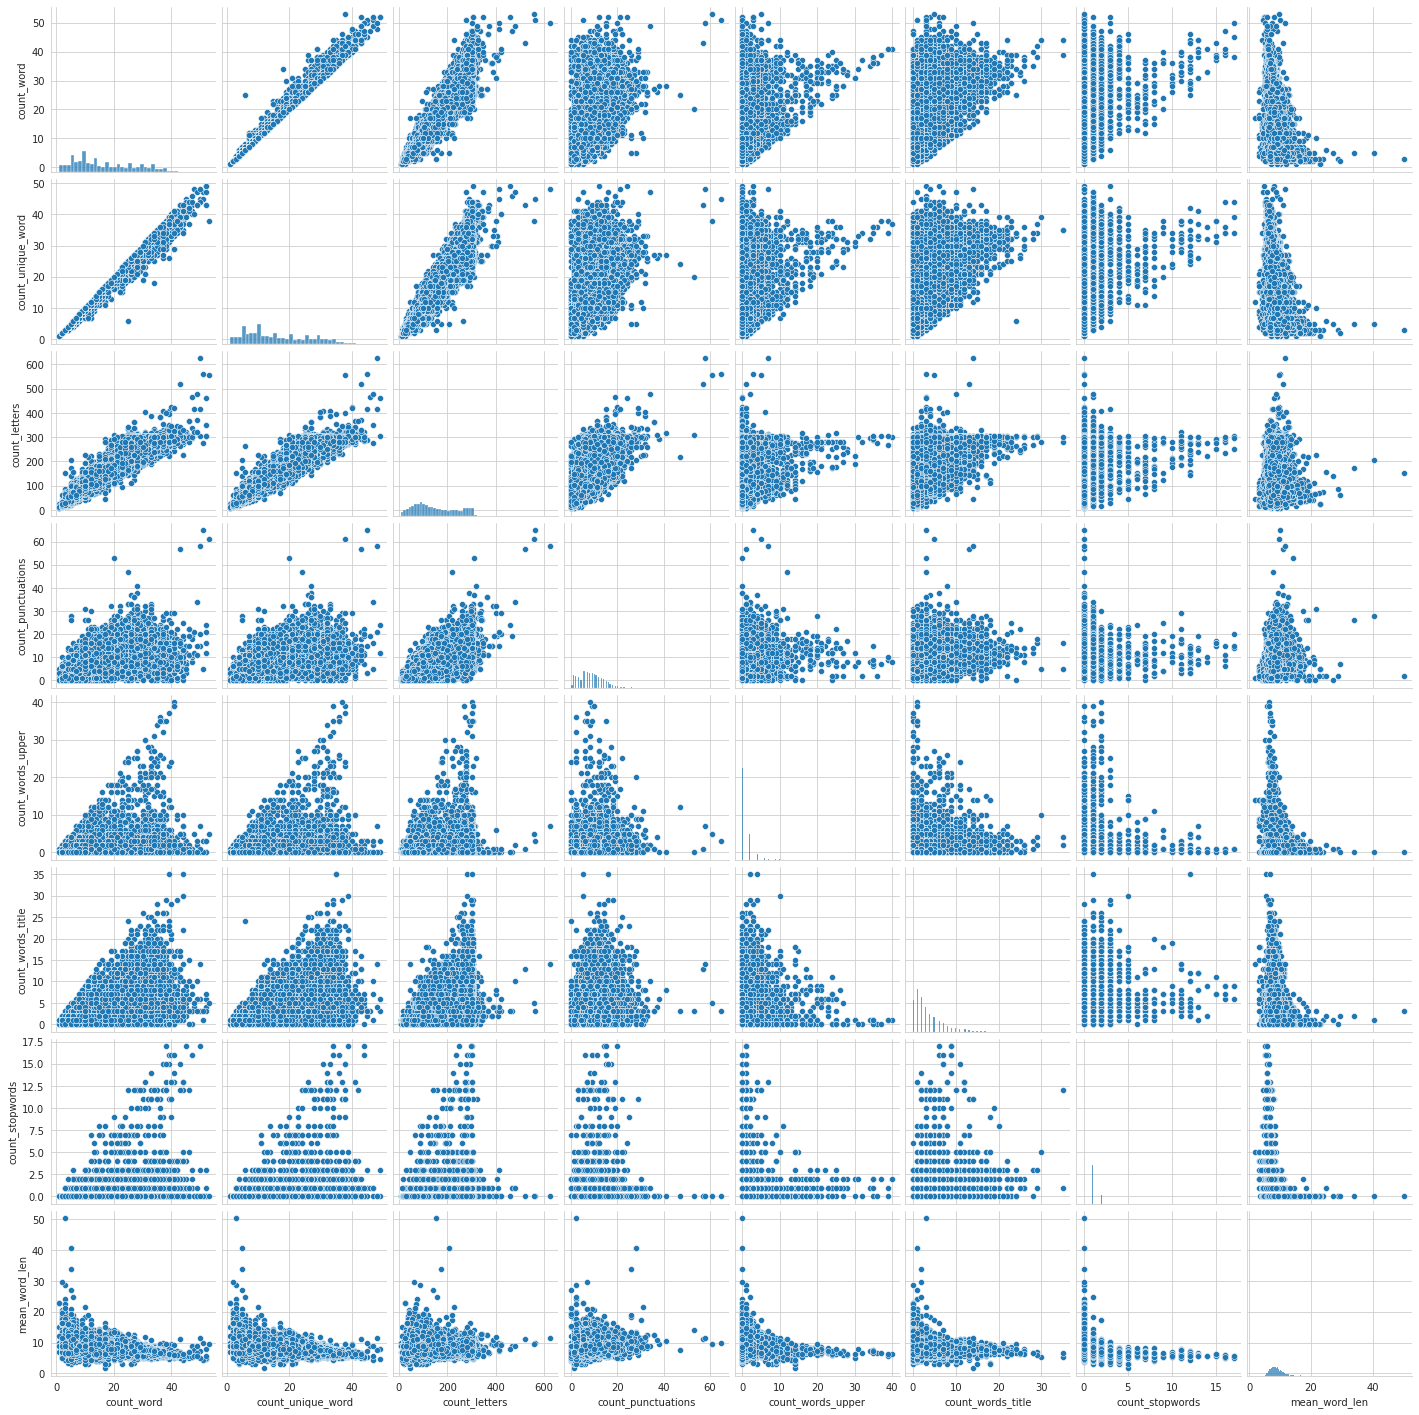

In [55]:
sample_df = df[['count_word','count_unique_word','count_letters','count_punctuations','count_words_upper','count_words_title','count_stopwords','mean_word_len' ]]
sns.pairplot(sample_df,palette="husl")
del sample_df

In [56]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace


freq_dict = defaultdict(int)
for sent in df["tweet"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"
                                          ])
fig.append_trace(trace0, 1, 1)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots.html')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:2312: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




In [57]:
freq_dict = defaultdict(int)
for sent in df["tweet"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams"
                                          ])
fig.append_trace(trace0, 1, 1)
fig['layout'].update(height=1200, width=1000, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

/usr/local/lib/python3.7/dist-packages/plotly/basedatatypes.py:2312: DeprecationWarning:

The append_trace method is deprecated and will be removed in a future version.
Please use the add_trace method with the row and col parameters.




In [59]:
freq_dict = defaultdict(int)
plotly.tools.set_credentials_file(username='Ratan2513', api_key='atZYQqpeRmUlL5jaST4E')
for sent in df["tweet"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams", 
                                          ])
fig.append_trace(trace0, 1, 1)
fig['layout'].update(height=1200, width=1500, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

AttributeError: ignored

In [60]:
cnt_ = df['place'].value_counts()
cnt_.reset_index()
cnt_ = cnt_[:20,]
trace1 = go.Bar(
                x = cnt_.index,
                y = cnt_.values,
                name = "Number of tweets on Australia polls by state.",
                marker = dict(color = 'rgba(200, 74, 55, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                )

data = [trace1]
layout = go.Layout(barmode = "group",title = 'Number of tweets on Australia polls by state.')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
#  bundan sonra bolgesel biseler yapmus devam etmedim  22-3 kod daha harita falan vardi eklemdim

In [61]:
data = [go.Scattermapbox(
            lat= df['lat'],
            lon= df['long'],
            mode='markers',
            marker=dict(
                size= 4,
                color = 'orange',
                opacity = .8,
            ),
          )]
layout = go.Layout(
    title = go.layout.Title(
        text = 'Tweets on Australia polls by state'
    ),
    geo = go.layout.Geo(
        scope = 'world',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth')

KeyError: ignored